<a href="https://colab.research.google.com/github/kunalmahadik/ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## **Importing Dataset**

In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 - Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding = 'latin')
# Printing the first 5 rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [58]:
# Creating a copy of the dataset
bike_df = df.copy()

In [59]:
# Checking the names of the features in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [60]:
# The features after renaming them
print('The features in the dataset:')
bike_df.columns

The features in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [61]:
# Checking the shape of the dataset
bike_df.shape

(8760, 14)



*   There are 8760 records and 14 features in the dataset. 
*   rented_bike_count is the dependent variable



In [62]:
# Checking the basic information of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are total 8760 rows in the dataset. All of them are non null. The hour feature is of int64 datatype. It should be converted to category as it is a categorical feature.

In [63]:
# Checking the descriptive statistics of the dataset
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [64]:
# Glance through the unique values
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'




*   We have the records of bike sharing from 01/12/2017 to 30/11/2018 which  
corresponds to 1 year.
*   There are total 4 seasons in the dataset: Spring, Winter, Summer, Autumn
*   The holiday has 2 values: Holdiay, No holiday
*   The functioning day has 2 values: Yes, No

### <b> Feature Description </b>

* ### **Date** : *The date of the day, type:str*
* ### **Rented Bike Count** - *Number of rented bikes per hour and it is also a dependent variable, type:int*
* ### **Hour** - *Hour of the day ranging from 0-23, type: int*
* ### **Temperature (°C)**-*Temperature in Celsius, type:float*
* ### **Humidity(%)** - *Humidity in the air in %, type: int*
* ### **Wind speed (m/s)** - *Speed of the wind in m/s, type: float*
* ### **Visibility (10m)** - *Visibility in m, type: int*
* ### **Dew point temperature(°C)** - *The temperature at which the water starts to condense out of the air, type: float*
* ### **Solar Radiation (MJ/m2)** - Electromagnetic radiation emitted by the Sun, type: float
* ### **Rainfall(mm)** - Amount of rainfall in mm, type: float *italicized text*
* ### **Snowfall(cm)** - *Amount of snowfall in cm, type: float*
* ### **Seasons** - *Season of the year, type: str*
* ### **Holiday** - *If the day is holiday or not, type: str*
* ### **Functioning Day** - *Whether the day is functional or not, type:str*




## Data Preparation and Cleaning

In [65]:
# Missing Values Check
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64



As we can see from above result that there are no missing values in the dataset.




### <b> Duplicate Values Check</b>


In [66]:
# Checking whether there are duplicate records in the dataset.
dup_no = len(bike_df[bike_df.duplicated()])
print('The number of duplicated rows in the dataset are: ', dup_no)

The number of duplicated rows in the dataset are:  0




*   There are not any duplicate rows and missing values in the dataset
*   Some feature names are quite lengthy, lets rename the features 



### **Renaming the features**


In [67]:
# Renaming the feature names

bike_df = bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [68]:
#Converting the 'date' feature from string to datetime 
bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


In [69]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['weekday'] = bike_df['date'].dt.weekday

In [70]:
# creating a new column of'weekdays_weekend' 
bike_df = bike_df.drop(columns = ['date'], axis = 1)

In [71]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


In [72]:
print(bike_df['weekday'].unique())

[4 5 6 0 1 2 3]


In [73]:
# since the weekdays are in range 0-6 lets convert it to 1-7
bike_df['weekday'] = np.array(bike_df['weekday']) + 1
bike_df['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [74]:
# Changing te data type of hour feature to categorical
feat = ['hour']
for ele in feat:
  bike_df[ele] = bike_df[ele].astype('category')

In [75]:
# Assigning month names to month numbers as well as day name to day numbers.
bike_df['months_string'] = bike_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df['days'] = bike_df['weekday'].map({1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}) 

In [76]:
# Updated dataset
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday


In [77]:
# dropping 'month' and 'weekday' columns as we have created the months_string and days features from this column
bike_df.drop(['month', 'weekday', 'year'], axis = 1, inplace = True)


## Exploratory Data Analysis

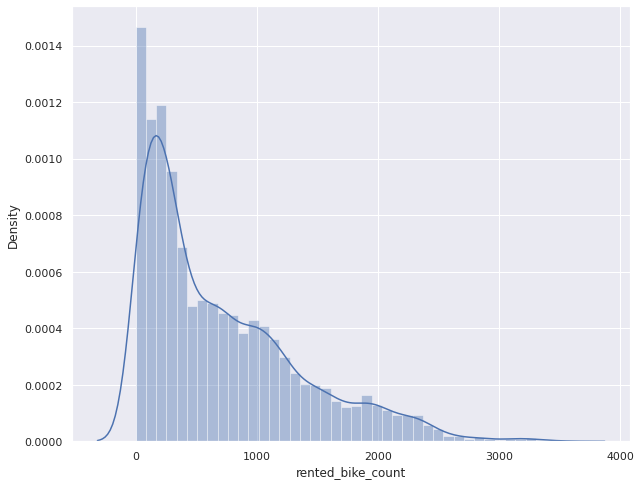

In [78]:
# Checking the distribution of the dependent variable
sns.distplot(bike_df['rented_bike_count'])
sns.set(rc = {'figure.figsize': (10,5)})




*   From the above distribution plot the dependent variable looks skewed.
*   The rented bike count data is positively skewed



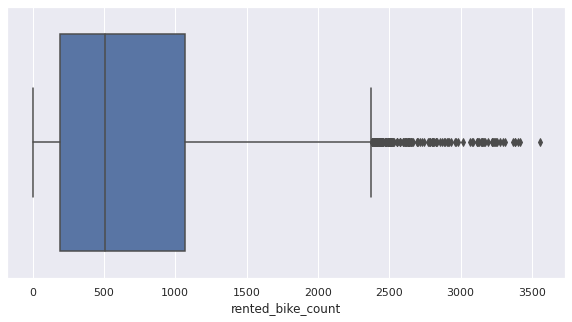

In [79]:
sns.boxplot(bike_df['rented_bike_count'])



*   The above boxplot shows that there are outliers in the rented bike count data




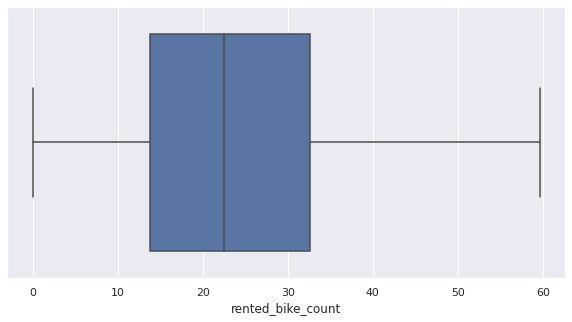

In [80]:
# Applying square root transformation as it normalize the skewed data
sns.boxplot(x = np.sqrt(bike_df['rented_bike_count']))



* After square root transformation outliers have been removed.
* Our model works best when the data is normally distributed.







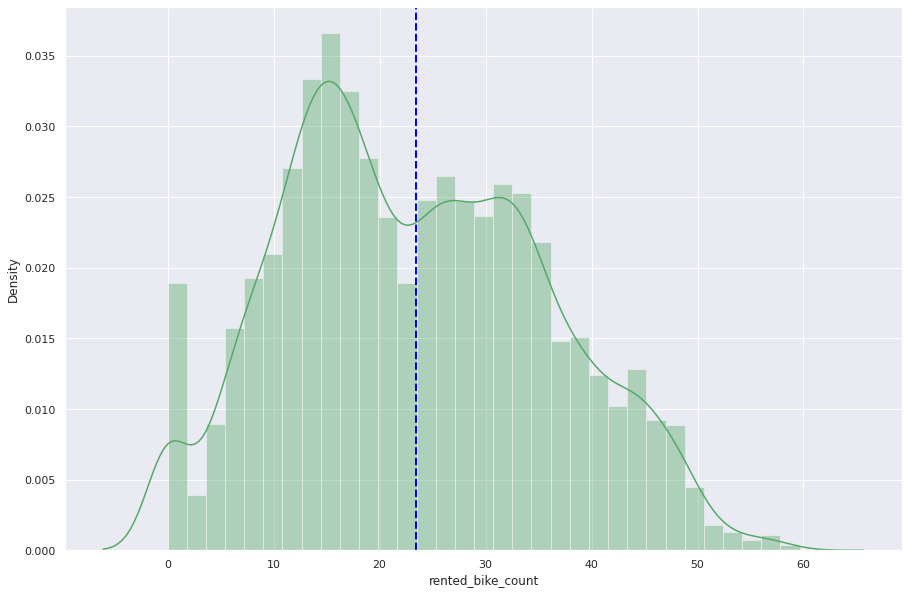

In [82]:
#Applying square root transformation to the dependent variable to remove the skewness
plt.figure(figsize=(15,10))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['rented_bike_count']), color="g")
ax.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='blue', linestyle='dashed', linewidth=2)

### Exploring Categorical Features

In [83]:
categorical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes == 'O']
print('The categorical features in the dataset are:',categorical_feat)

The categorical features in the dataset are: ['seasons', 'holiday', 'func_day', 'months_string', 'days']


Finding relation between various features and dependent variable using Bar plot

Text(0.5, 1.0, 'Bike count on different seasons')

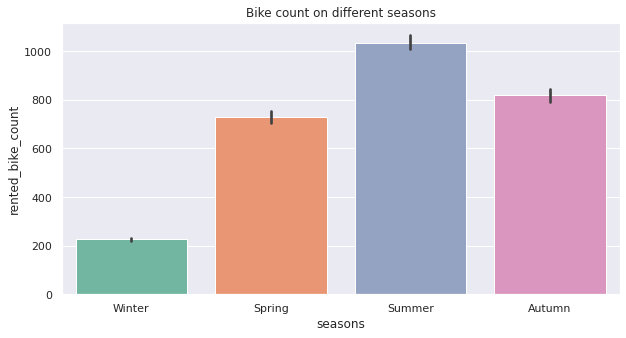

In [84]:
# Finding relation between seasons and rented bike count
sns.barplot(x = 'seasons', y = 'rented_bike_count', data = bike_df, palette = 'Set2').set_title('Bike count on different seasons')


Rented bike count is significantly less in Winter whereas high on summer

Text(0.5, 1.0, 'Rented bike count on each day')

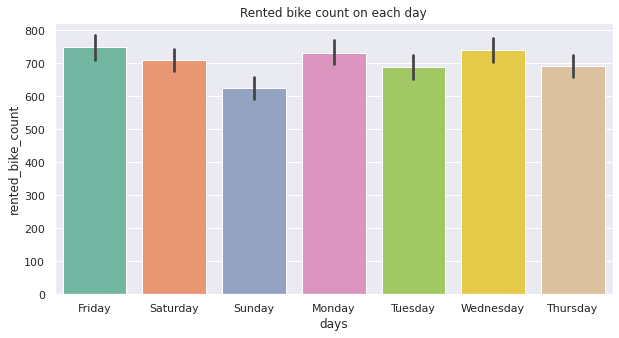

In [85]:
# plot for the rented bike count against weekday
sns.barplot( x= 'days', y = 'rented_bike_count', data = bike_df, palette = 'Set2').set_title('Rented bike count on each day')

In all days, the bike count is more or less the same

Text(0.5, 1.0, 'Rented bike count on holiday v/s non holiday')

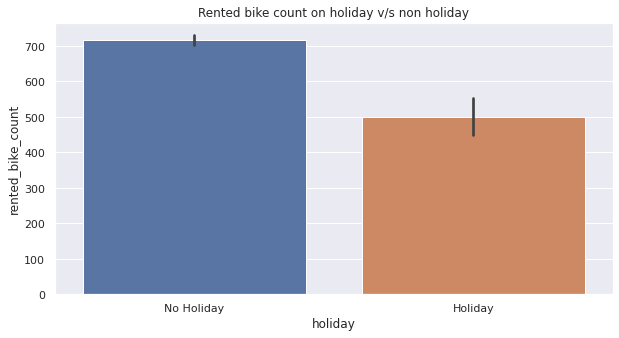

In [86]:
# Understanding the rented bike count on holiday vs non holiday
sns.barplot(x = 'holiday',y='rented_bike_count', data = bike_df).set_title('Rented bike count on holiday v/s non holiday')

We see that people are renting bike more on non holidays than holidays.

Text(0.5, 1.0, 'Rented bike count based on functioning day')

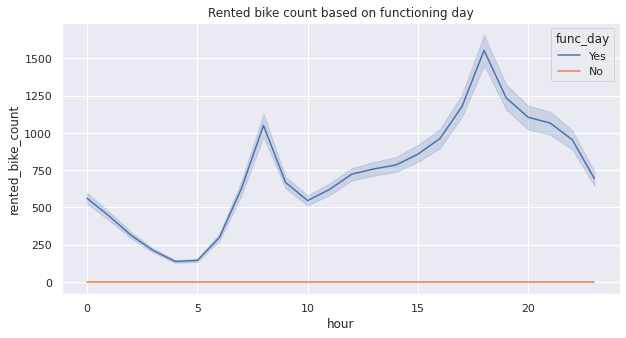

In [87]:
# Rented bike count on func vs non func day
sns.lineplot(data = bike_df, x='hour', y = 'rented_bike_count', hue = 'func_day').set_title('Rented bike count based on functioning day')


* The above plot suggests that the people use bikes only on functioning day.
* Also it means from company's perspective, if anyone uses bike on a day then that is a funcitoning day.


### Exploring Numerical Features

In [88]:
# Collecting numerical features present in the dataset
numerical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O' and feature not in ['weekday', 'month', 'date', 'year', 'rented_bike_count', 'hour'] ]
numerical_feat

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

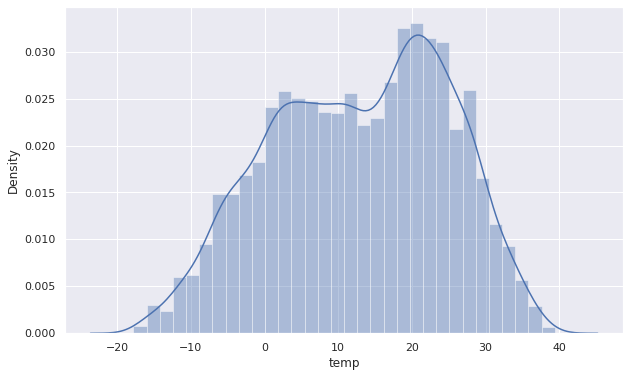

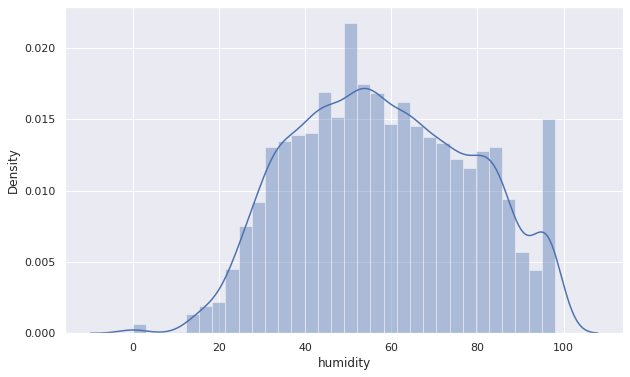

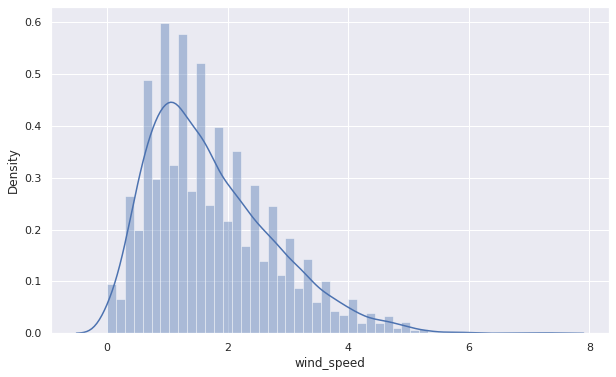

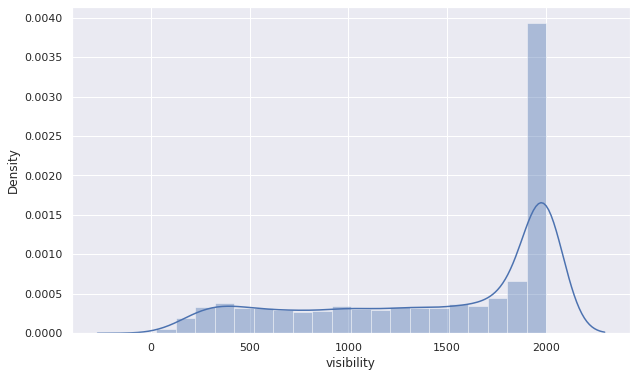

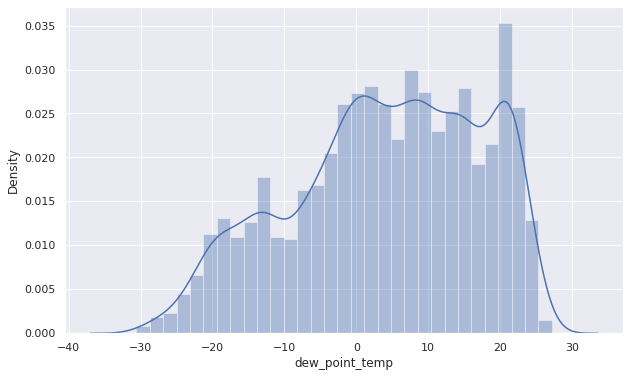

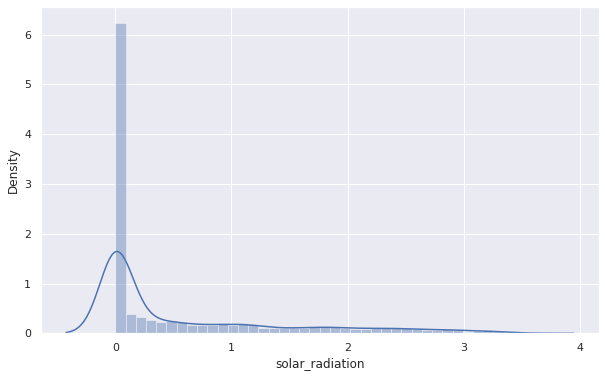

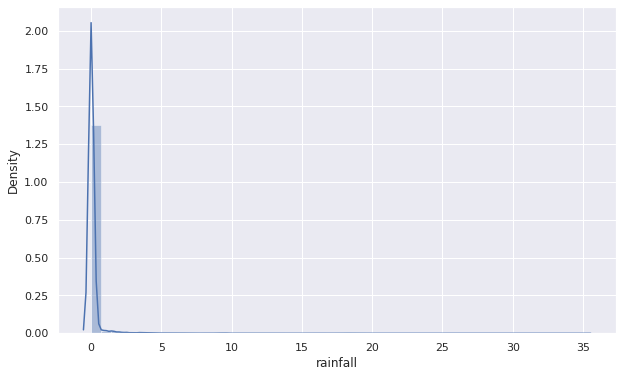

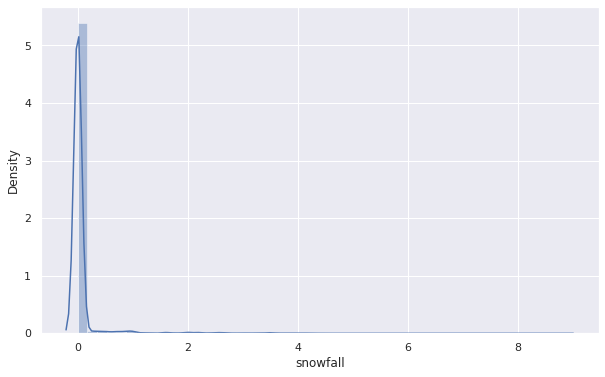

In [89]:
#visualising displots to analyze the distribution of all numerical features
for col in numerical_feat:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  sns.set_theme(); np.random.seed(0)
  plt.xlabel(col)
plt.show()

Understanding the relation between various numerical features and dependent variable



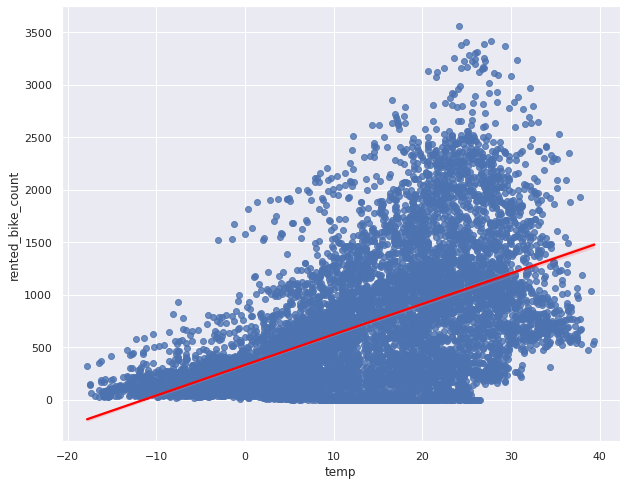

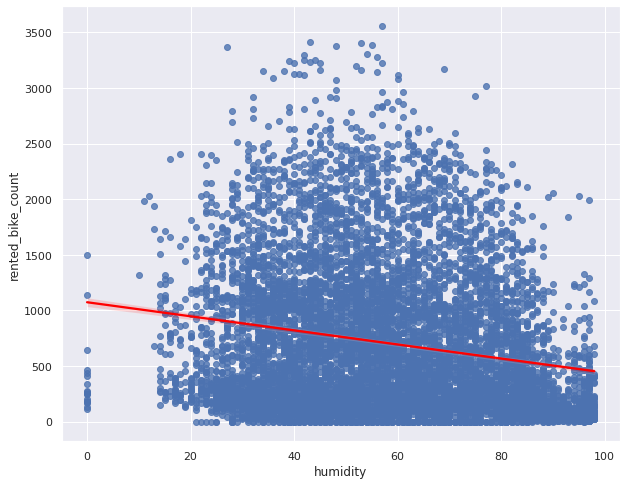

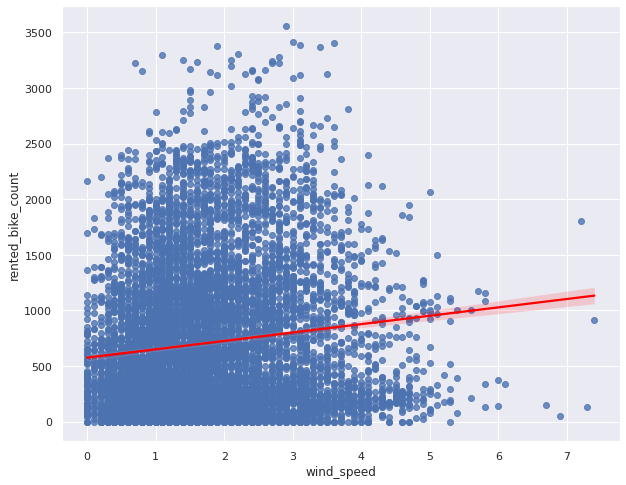

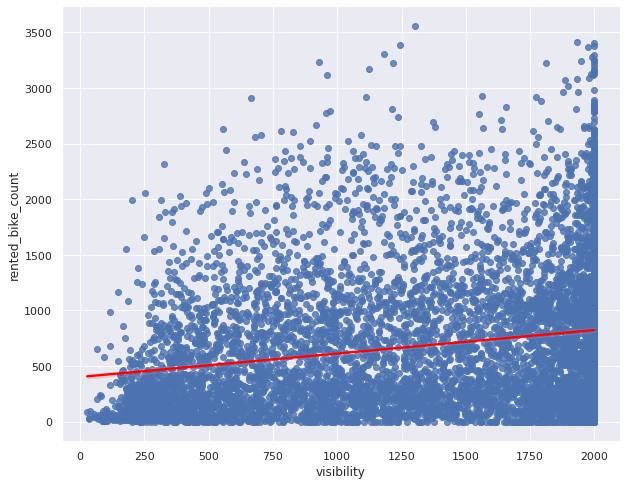

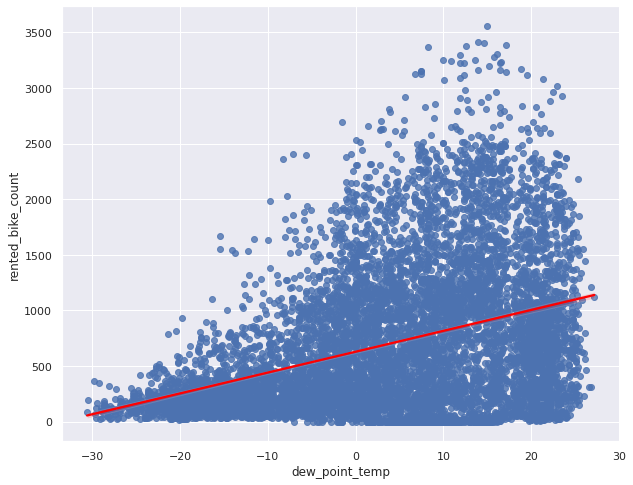

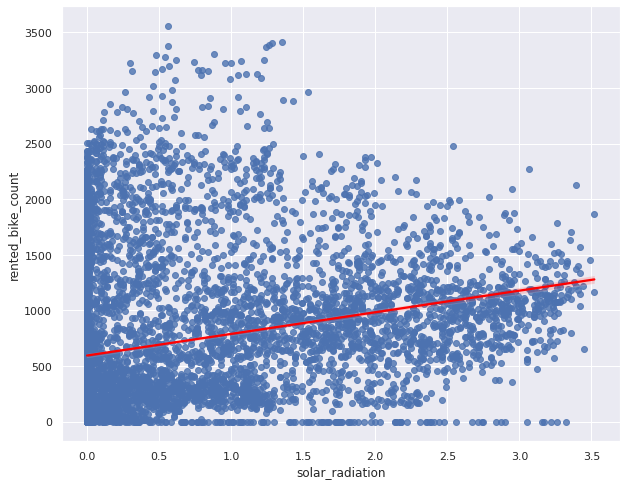

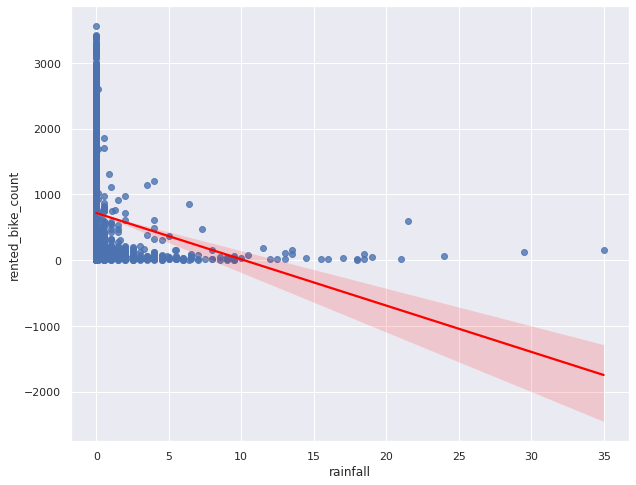

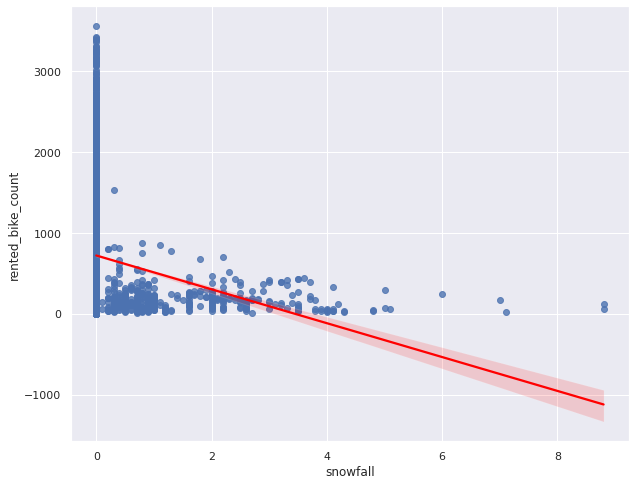

In [90]:
# Plotting regression plot for each numerical feature 
plt.rcParams['figure.figsize'] = (10,8)
for feat in numerical_feat:
  plt.figure()
  sns.regplot( x =bike_df[feat], y = bike_df['rented_bike_count'], line_kws={"color": "Red"})

### Observation on relation between numerical fatures and dependent variable



*   **hour** - The demand for bike increases throughout the day, maximum at around 6 pm.
*   **temp** - Temperature is positively correlated with the people using bikes. The maximum is between 20 °C and 30 °C.
*   **humidity** - Humidity is the amount of water vapor in the air. Looking at the reg plot, people prefer using bikes when there is less humidity.
*   **visibility** - Visibility does not affect much still showing a slight positive correlation with people renting bike.
*   **snowfall and rainfall** - People don't prefer renting bike when there is ranifall or snowfall. 
*   **dew_point_temp** - The dew point temperature is positively correlated to the dependent variable.
*   **wind_speed** - The wind speed don't affect much the dependent variable.
*   **Solar_radiation** - Solar radiation seems to slightly positive correlated with the dependent variable.














###Understanding relation between other features and dependent variable

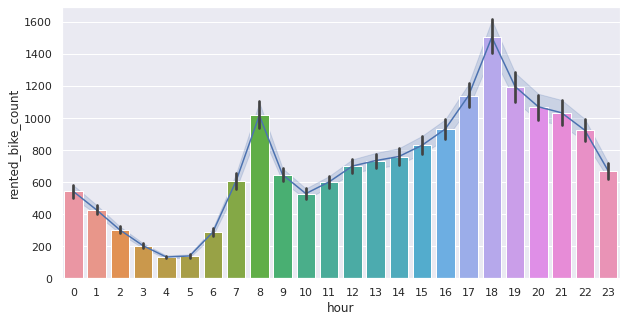

In [91]:
# bar plot between hour and rented bike count
plt.figure(figsize = (10,5))
sns.lineplot( x = bike_df['hour'], y = bike_df['rented_bike_count'])
sns.barplot(x = bike_df['hour'], y = bike_df['rented_bike_count'])

From the above plot it seems that demand is high around 6-9 am and 7-9 pm.

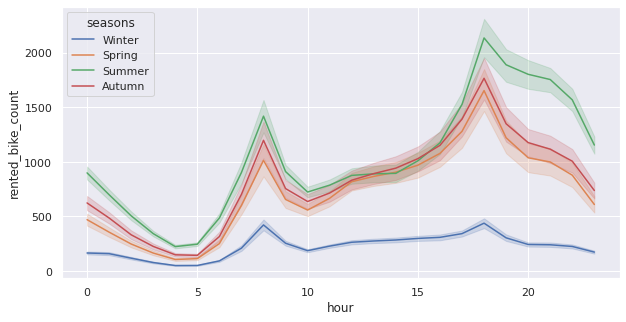

In [92]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'hour', y = 'rented_bike_count', hue = 'seasons')



* The above plot indicates that people prefer renting bike more in summer season and least in winter season.
* The plot also indicates that people prefer renting bike in the evening at around 4pm to 8pm as well as in the morning 6-9am.
* Looking at the time it is possible that people going to offices use bikes for commute.




## Lets understand the correlation between variables.

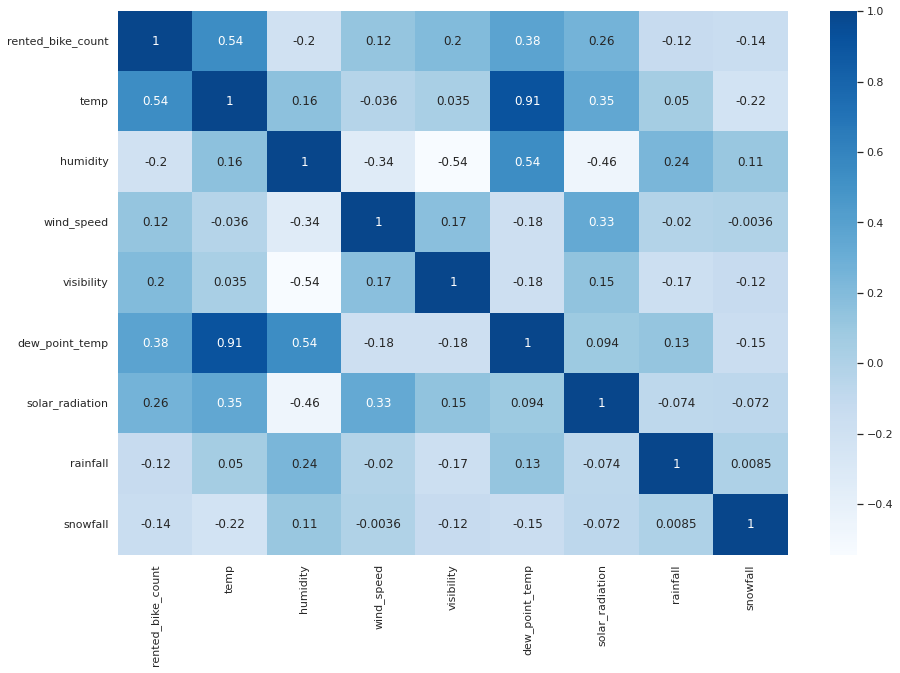

In [94]:
# Understanding correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues', center = 0.3)

            

*   Hour and temperature are highly correlated with bike count as compared to other features.
* Rainfall and snowfall are negatively correlated with rented bike count.
*  Dew point temp and temperature are highly correlated with each other, we can add them together.



In [95]:
# Lets drop the columns which are not important
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


In [96]:
bike_df.head(2)

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


In [97]:
# creating new feature from temperature and dew point temperature as they both are related to each other.
bike_df['Temperature_and_dew_temp'] = bike_df['temp'] + bike_df['dew_point_temp']
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days,Temperature_and_dew_temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-24.6


In [98]:
# Dropping temperature and dew point temperature columns as we merged these 2 features to make a single feature to remove multicollinearity
bike_df.drop(['temp', 'dew_point_temp'], axis =1, inplace = True)

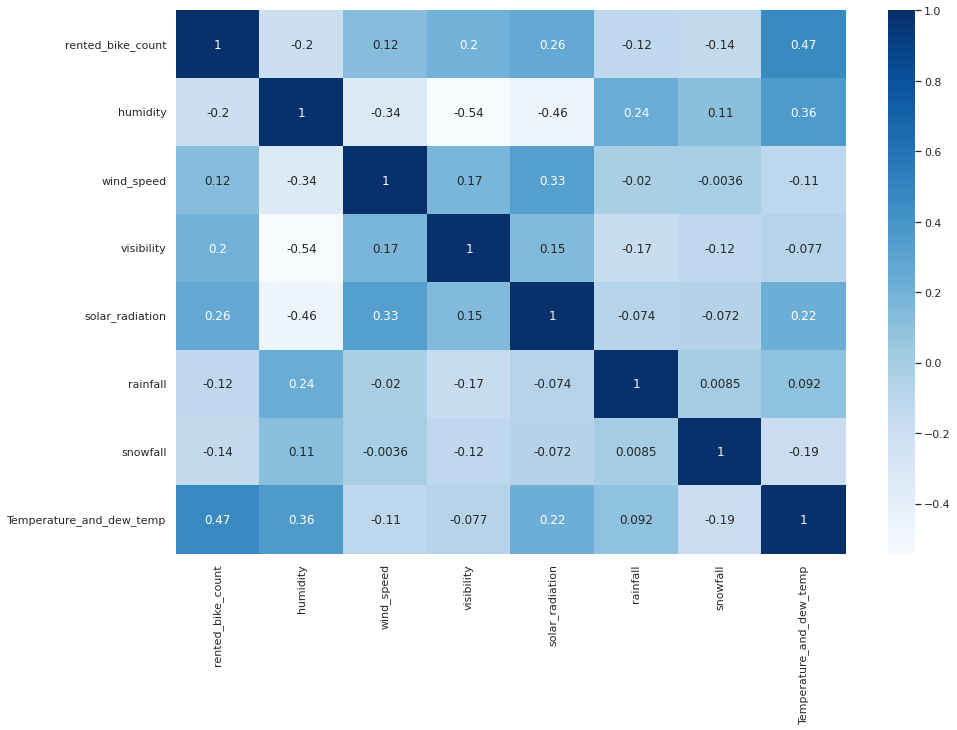

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues')

* We can find that the following features are positively correlated with target variable:
1. temperature and dew point temperature
2. solar radiation

* The following features are negatively correlated with target variable:
1. rainfall
2. snowfall

### Creating dummy variables of categorical features
#### One hot encoding
**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [99]:
# Encoding categorical variables
cat_feat = list(bike_df.select_dtypes(['object', 'category']).columns)
cat_feat = pd.Index(cat_feat)
cat_feat

Index(['hour', 'seasons', 'holiday', 'func_day', 'months_string', 'days'], dtype='object')

In [100]:
# # One hot encoding
# #creating a copy of the dataframe
bike_data = bike_df.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in cat_feat:
  bike_data = one_hot_encoding(bike_data, col)



In [101]:
bike_data.head(10)

,rented_bike_count,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Temperature_and_dew_temp,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,func_day_Yes,months_string_August,months_string_December,months_string_February,months_string_January,months_string_July,months_string_June,months_string_March,months_string_May,months_string_November,months_string_October,months_string_September,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday
0,254,37,2.2,2000,0.00,0.0,0.0,-22.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,0.00,0.0,0.0,-23.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,0.00,0.0,0.0,-23.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,0.00,0.0,0.0,-23.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,0.00,0.0,0.0,-24.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100,37,1.5,2000,0.00,0.0,0.0,-25.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,181,35,1.3,2000,0.00,0.0,0.0,-26.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,460,38,0.9,2000,0.00,0.0,0.0,-26.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,930,37,1.1,2000,0.01,0.0,0.0,-27.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,490,27,0.5,1928,0.23,0.0,0.0,-28.9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

Linear regression have some assumptions which are as follows:



*   **Linear relationship**: Relationship between the target variable and the features should be linear.
*   **Little or No multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are correlated with each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error is the same across the data.



In [113]:
# Separating the dependent and independent features.
X = bike_data.drop(columns= ['rented_bike_count'], axis =1)
y = np.sqrt(bike_data['rented_bike_count'])

In [114]:
#Checking the variance inflation factor for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [115]:
calc_vif(bike_data[[i for i in bike_df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,humidity,4.948927
1,wind_speed,4.172802
2,visibility,4.390699
3,solar_radiation,2.056034
4,rainfall,1.078836
5,snowfall,1.116727
6,Temperature_and_dew_temp,2.166404


The VIF factor is less than 10 for all features which indicates no multicolinearity.

In [109]:
# Split the data for train and test
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)


(7008, 52)


In [110]:
# Fitting a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
# Checking the score
lr.score(X_train, y_train)

0.7780822840147327

In [112]:
# Checking the coefficient
lr.coef_

array([-1.89420986e-01, -6.20493687e-02,  1.15220781e-03,  9.73769591e-01,
       -1.49176629e+00, -2.35928703e-02,  2.75604205e-01, -1.96496866e+00,
       -4.87380467e+00, -7.20790865e+00, -9.43129107e+00, -9.08037787e+00,
       -4.02811441e+00,  2.18280324e+00,  7.56808925e+00,  1.26919884e+00,
       -3.23168268e+00, -3.45697279e+00, -2.72169688e+00, -2.84517583e+00,
       -2.81215060e+00, -1.65994756e+00,  2.48248599e-01,  3.91114018e+00,
        1.04495601e+01,  6.81993253e+00,  6.01831914e+00,  6.32778470e+00,
        5.05285500e+00,  1.53055615e+00, -1.08520833e+00, -1.68227492e+00,
       -3.15529554e+00,  3.29740854e+00,  2.85948391e+01, -4.16573081e+00,
        5.63430165e-01, -2.26015509e+00, -1.45857061e+00, -1.89003170e+00,
        4.37348759e+00, -9.52233314e-01,  1.92200385e+00,  2.67654401e+00,
        3.17477103e+00,  7.14637545e-02, -1.31874729e+00, -1.15399825e+00,
       -2.75636524e+00, -5.64729455e-01, -4.55895116e-01, -4.16426755e-01])

In [ ]:
# Predicting results on train and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
# evaluating the metrics on train set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_train)**2, (y_pred_train)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 100605.9122673585
RMSE : 317.1843506028608
MAE : 215.73174171121056
R2 : 0.7577179934011766
Adjusted R2 : 0.7503026524105123


The r2 score for the train set is 0.757 which is good.

In [ ]:
# Saving the metrics of train set in a dataframe
train_dict = {'Model': 'Linear regression train',
              'MAE': round((MAE_lr), 3),
              'MSE':round((MSE_lr),3),
              'RMSE':round((RMSE_lr),3),
              'R2_score':round((r2_lr),3),
              'Adjusted R2':round((Adjusted_R2_lr ),2)
              }
train_df = pd.DataFrame(train_dict, index =[0])
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75


In [ ]:
# checking the metrics on test set
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test**2, y_pred_test**2)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test)**2, (y_pred_test)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 98047.31356421151
RMSE : 313.1250765496298
MAE : 212.05237632910647
R2 : 0.7657299360440506
Adjusted R2 : 0.7585598104844806


The r2_score for the test set is 0.765

In [ ]:
# storing the metrics of test set in a df
test_dict = {'Model':'Linear regression test ',
            'MAE':round((MAE_lr),3),
            'MSE':round((MSE_lr),3),
            'RMSE':round((RMSE_lr),3),
            'R2_score':round((r2_lr),3),
            'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df = pd.DataFrame(test_dict, index = [0])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.76


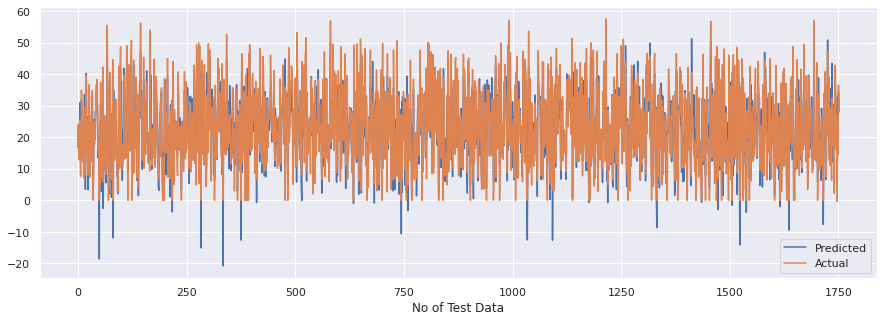

In [ ]:
#Plotting the actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

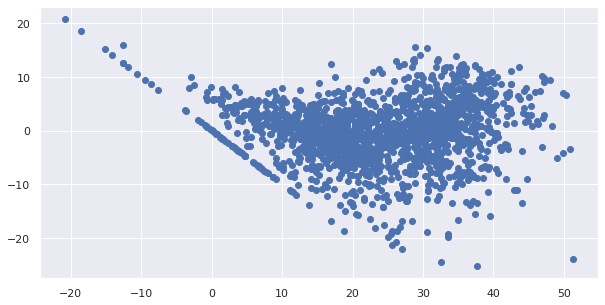

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test), (y_test)-(y_pred_test))

### Lasso Regression

In [ ]:
# Using GridSearch CV for hyperparameter tuning
### Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100] }
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=7)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -34.94214375606561


In [ ]:
# Creating an instance of Lasso Regression
# Using alpha = 0.01 as we got from GridSearch CV
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001,max_iter = 3000 )


In [ ]:
# Fitting the model onto training set
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# lasso score
lasso.score(X_train, y_train)

0.7780729620575232

In [ ]:
# Predicting the results on train and test
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
#metrics for lasso regressor for train dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_la= mean_squared_error((y_train**2), (y_pred_train_lasso**2))
print("MSE :",MSE_la)

#calculate RMSE
RMSE_la=np.sqrt(MSE_la)
print("RMSE :",RMSE_la)


#calculate MAE
MAE_la= mean_absolute_error(y_train**2, y_pred_train_lasso**2)
print("MAE :",MAE_la)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_la= r2_score((y_train)**2, (y_pred_train_lasso)**2)
print("R2 :",r2_la)
Adjusted_R2_la = ((1-(1-r2_la)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_la)


MSE : 100800.30348062365
RMSE : 317.4906352644494
MAE : 215.86389963123858
R2 : 0.7572498549771652
Adjusted R2 : 0.7498201860300273


The r2_score for data using lasso regression is 0.757

In [ ]:
# Storing the metrics of train set in a dataframe
train_dict = {'Model': 'Lasso Regression train',
              'MAE': round((MAE_la), 3),
              'MSE':round((MSE_la),3),
              'RMSE':round((RMSE_la),3),
              'R2_score':round((r2_la),3),
              'Adjusted R2':round((Adjusted_R2_la ),2)
              }
train_df = train_df.append(train_dict, ignore_index = True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75


In [ ]:
#metrics for lasso regressor for test dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_la= mean_squared_error((y_test**2), (y_pred_test_lasso**2))
print("MSE :",MSE_la)

#calculate RMSE
RMSE_la=np.sqrt(MSE_la)
print("RMSE :",RMSE_la)


#calculate MAE
MAE_la= mean_absolute_error(y_test**2, y_pred_test_lasso**2)
print("MAE :",MAE_la)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_la= r2_score((y_test)**2, (y_pred_test_lasso)**2)
print("R2 :",r2_la)
Adjusted_R2_la = (1-(1-r2_la)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_la)

MSE : 98235.1747597836
RMSE : 313.4249108794379
MAE : 212.2031411267829
R2 : 0.7652810685258937
Adjusted R2 : 0.7580972048197998


In [ ]:
# Storing the metrics of test set in a dataframe
test_dict = {'Model': 'Lasso regression test',
              'MAE': round((MAE_la), 3),
              'MSE':round((MSE_la),3),
              'RMSE':round((RMSE_la),3),
              'R2_score':round((r2_la),3),
              'Adjusted R2':round((Adjusted_R2_la ),2)
              }
test_df = test_df.append(test_dict, ignore_index= True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.76
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.76


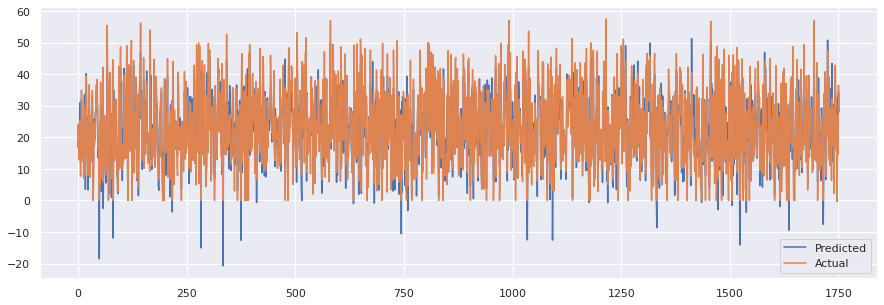

In [ ]:
# Plotting the actual and predicted values for lasso regression
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

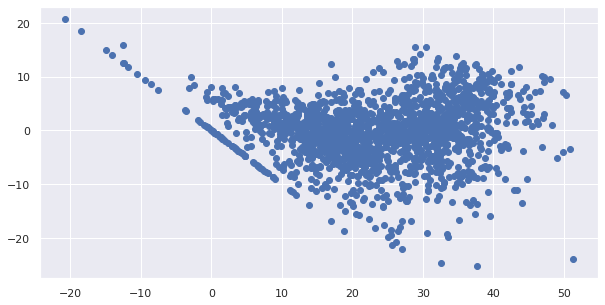

In [ ]:
## Heteroscedasticity
plt.scatter((y_pred_test_lasso), (y_test)- (y_pred_test_lasso))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -34.8761003446125


In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=1)

In [ ]:
#fitting the model
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
# Checking the score
ridge.score(X_train, y_train)**2

0.6054018821533161

In [ ]:
# predicted the results on train and test data
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [ ]:
# Check the evaulation metrics for train dataset for ridge regeression
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train**2), (y_pred_train_ridge**2))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train**2, y_pred_train_ridge**2)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_train)**2, (y_pred_train_ridge)**2)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_r)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_r )

MSE : 100807.65245404908
RMSE : 317.50220858137203
MAE : 215.87971845825064
R2 : 0.7572321569712746
Adjusted R2 : 0.7498019463547392


In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression train ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),3)}
train_df = train_df.append(dict1, ignore_index = True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75
2,Ridge regression train,215.880,100807.652,317.502,0.757,0.75


In [ ]:
# Check the evaulation metrics for test dataset for ridge regression
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_test)**2, (y_pred_test_ridge)**2)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test**2, y_pred_test_ridge**2)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test)**2, (y_pred_test_ridge)**2)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_train)**2, (y_pred_train_ridge)**2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) ))
print("Adjusted R2 :",Adjusted_R2_r )

MSE : 98257.40907824635
RMSE : 313.460378801287
MAE : 212.23370338006276
R2 : 0.7652279427948672
Adjusted R2 : 0.7804081853188356


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression test',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),3)}
test_df= test_df.append(dict1, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.76
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.76
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.78


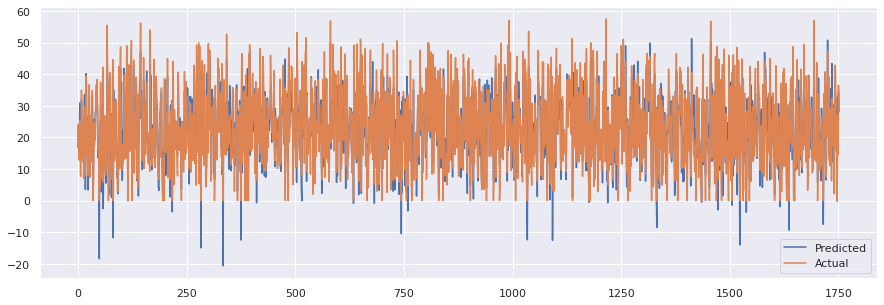

In [ ]:
# Plotting the actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

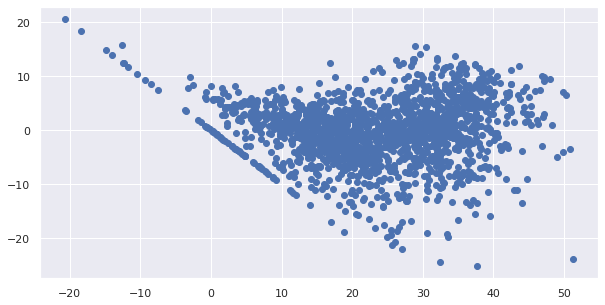

In [ ]:
## Heteroscedasticity
plt.scatter((y_pred_test_ridge), (y_test)-(y_pred_test_ridge))

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(l1_ratio = 0.5)
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
elastic_net_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_net_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_net_regressor.best_params_)
print("\nUsing ",elastic_net_regressor.best_params_, " the negative mean squared error is: ", elastic_net_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -34.87719036829771


In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet

elasticnet= ElasticNet(alpha=0.00001)

In [ ]:
# Fit the model
elasticnet.fit(X_train,y_train)


ElasticNet(alpha=1e-05)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.7780822739397573

In [ ]:
#predicting the results for train and test data
y_pred_train_en = elasticnet.predict(X_train)
y_pred_test_en = elasticnet.predict(X_test)

In [ ]:
#evaluating metrics for train data
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train**2), (y_pred_train_en**2))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train**2, y_pred_train_en**2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_train)**2, (y_pred_train_en)**2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_train)**2, (y_pred_train_en)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e )


MSE : 100613.77639400275
RMSE : 317.19674713654103
MAE : 215.7375838946109
R2 : 0.7576990547887176
Adjusted R2 : 0.7502831341583547


The r2 score for elastic net is 0.757 which suggests that model is able to capture most of the data variance.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression train',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
train_df = train_df.append(dict1, ignore_index = True)


In [ ]:
#evaluating metrics for test data
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test**2, y_pred_test_en**2)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test**2, y_pred_test_en**2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test)**2, (y_pred_test_en)**2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test)**2, (y_pred_test_en)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e )


MSE : 98055.5049129043
RMSE : 313.1381562711646
MAE : 212.05953020308382
R2 : 0.7657103639852926
Adjusted R2 : 0.7585396393986152


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.760
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.760
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.780
3,Elastic net regression Test,212.060,98055.505,313.138,0.766,0.759


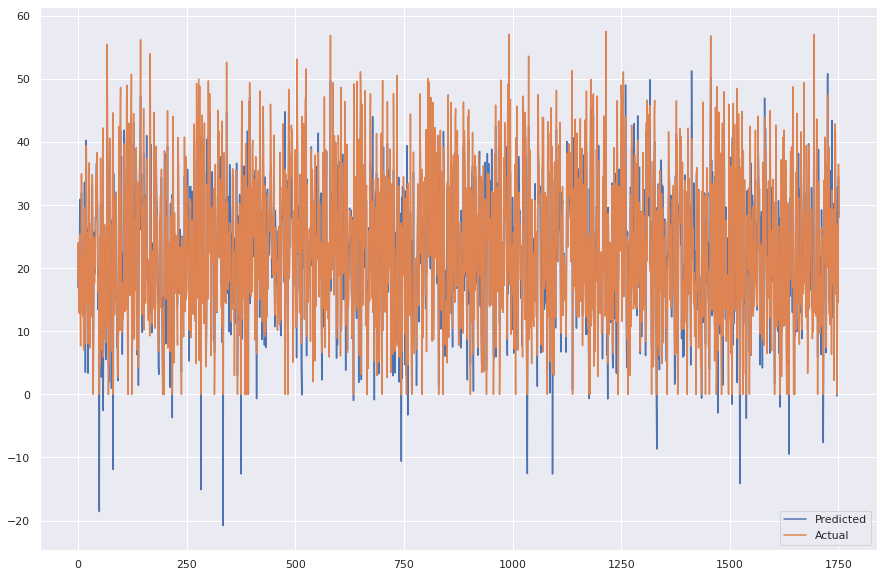

In [ ]:
#Plot the actual and predicted values in case of elastic net
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

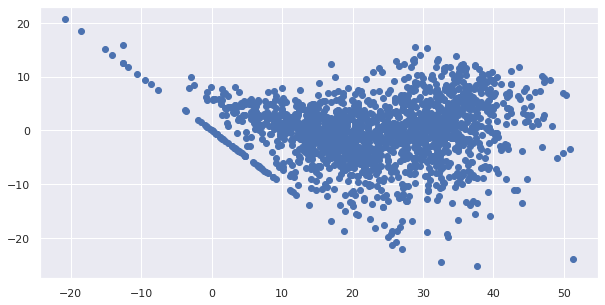

In [ ]:
## Heteroscedasticity
plt.scatter((y_pred_test_en), (y_test)-(y_pred_test_en))

Text(0.5, 1.0, 'elastic net regularization')

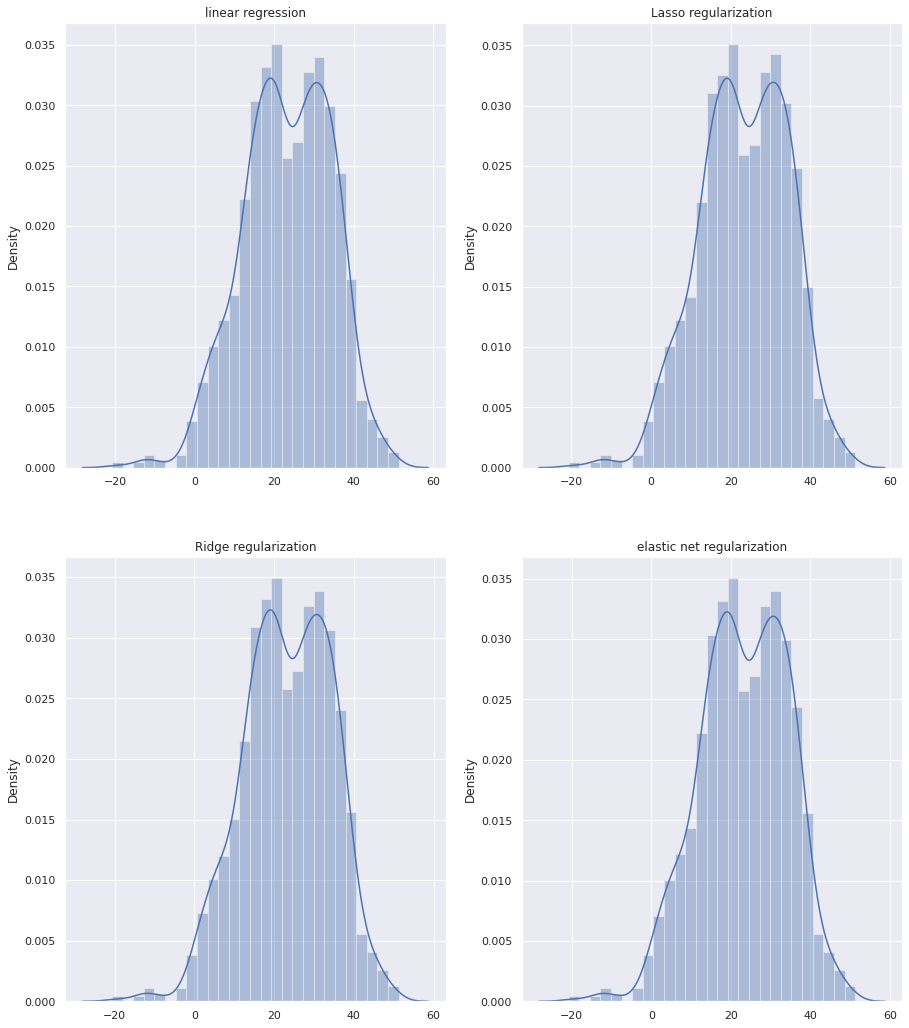

In [ ]:
#lets see the plot of predicted y of all the model and the distribution of curve to pictorally visualized the difference


y_pred_test_linear = lr.predict(X_test)
y_pred_test_lasso= lasso.predict(X_test)
y_pred_test_ridge= ridge.predict(X_test)
y_pred_test_elastic= elasticnet.predict(X_test)



plt.figure(figsize =(15,18))

plt.subplot(2,2,1)
sns.distplot(y_pred_test_linear)
plt.title('linear regression')
plt.subplot(2,2,2)
sns.distplot(y_pred_test_lasso)
plt.title('Lasso regularization')
plt.subplot(2,2,3)
sns.distplot(y_pred_test_ridge)
plt.title('Ridge regularization')
plt.subplot(2,2,4)
sns.distplot(y_pred_test_elastic)
plt.title('elastic net regularization')

## Decision Tree

In [ ]:
# importing the packages essential for decision tree algorithm
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=100, random_state=0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=10,
                      max_leaf_nodes=100, random_state=0)

In [ ]:
# predict the test and train results
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#evaluating the metrics of decision tree on train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train**2, y_pred_train_d**2)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train**2, y_pred_train_d**2)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_train)**2, (y_pred_train_d)**2)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test**2), (y_pred_test_d**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )


Model Score: 0.7581755514301581
MSE : 129012.39905028316
RMSE : 359.1829604119371
MAE : 237.00706845725372
R2 : 0.6893086875951706
Adjusted R2 : 0.6703175507788324


The r2_score for the train set is 0.71 which suggests that model is able to capture most of the data.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree train ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
train_df = train_df.append(dict2, ignore_index = True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75
2,Ridge regression train,215.880,100807.652,317.502,0.757,0.75
3,Elastic net regression train,215.738,100613.776,317.197,0.758,0.75
4,Decision tree train,240.900,133881.930,365.899,0.680,0.67


In [ ]:
# evaluating metrics for test set
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test**2, y_pred_test_d**2)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test**2, y_pred_test_d**2)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test)**2, (y_pred_test_d)**2)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test**2), (y_pred_test_d**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )


MSE : 133881.92968315782
RMSE : 365.8987970507116
MAE : 240.89976181684554
R2 : 0.6801082345935101
Adjusted R2 : 0.6703175507788324


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.760
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.760
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.780
3,Elastic net regression Test,212.060,98055.505,313.138,0.766,0.759
4,Decision tree train,240.900,133881.930,365.899,0.680,0.670


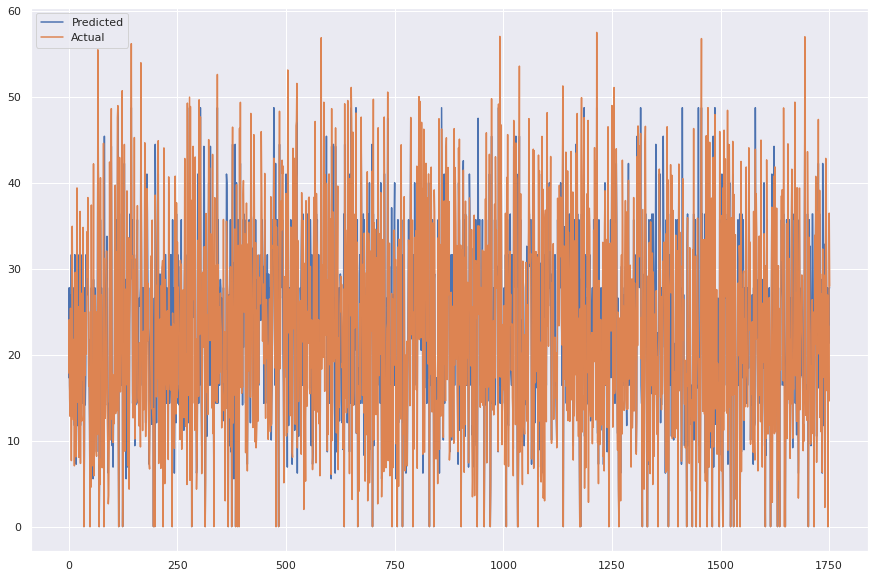

In [ ]:
# plotting the actual and predicted values
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

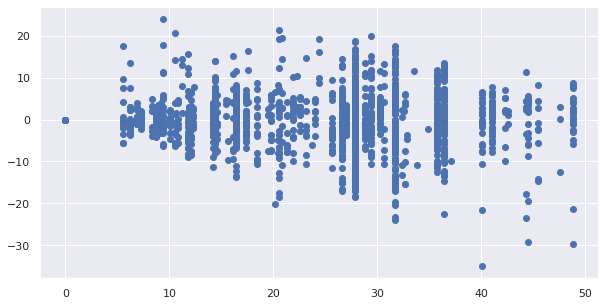

In [ ]:
# Heteroscedasticity check
plt.scatter((y_pred_test_d), (y_test)-(y_pred_test_d))

The above plot looks homogeneous as compared to the linear, lasso and ridge regression

In [ ]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import graphviz


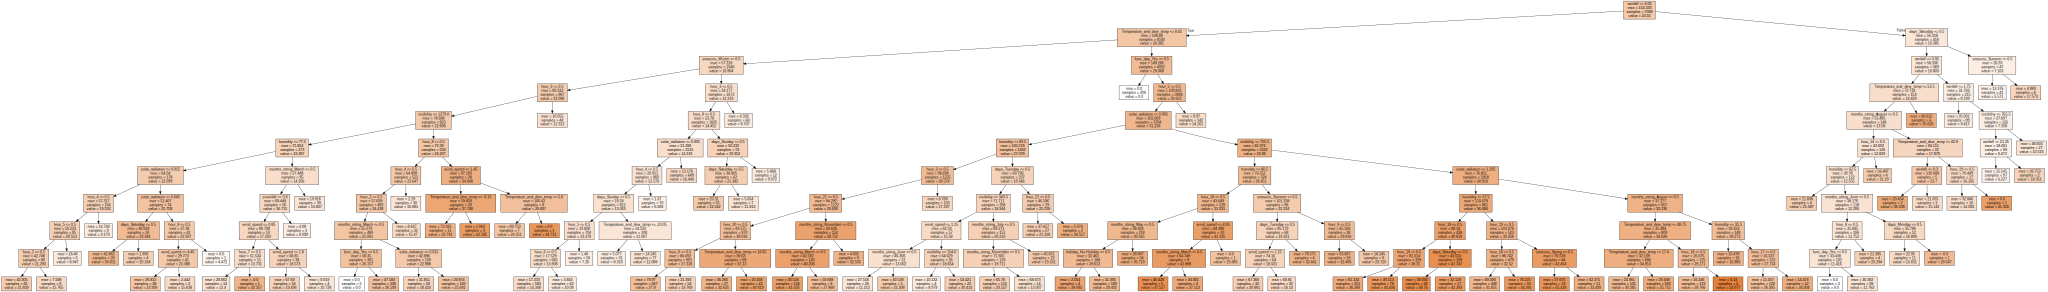

In [ ]:
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

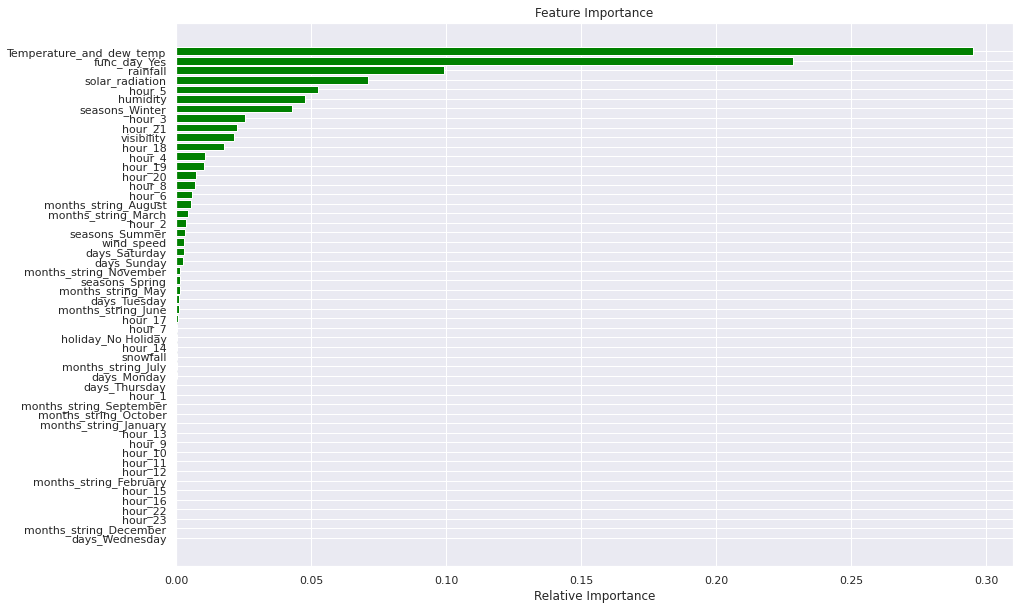

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X_train.columns
importances = decision_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Random Forest

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
# evaluating metrics for train data
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train**2, y_pred_train_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train**2, y_pred_train_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_train)**2, (y_pred_train_r)**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train**2, y_pred_train_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted_R2 :', Adjusted_R2_rf)

Model Score: 0.9888875020261875
MSE : 4970.733450929654
RMSE : 70.50342864662437
MAE : 41.32239601944974
R2 : 0.9880293389561572
Adjusted_R2 : 0.9876629620436911


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
train_df = train_df.append(dict1, ignore_index = True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75
2,Ridge regression train,215.880,100807.652,317.502,0.757,0.75
3,Elastic net regression train,215.738,100613.776,317.197,0.758,0.75
4,Decision tree train,240.900,133881.930,365.899,0.680,0.67
5,Random forest regression,41.322,4970.733,70.503,0.988,0.99


In [ ]:
# evaluating the metrics for test data
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, y_pred_test_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, y_pred_test_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test**2), (y_pred_test_r**2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test**2), (y_pred_test_r**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


MSE : 39007.822636910016
RMSE : 197.50398131913698
MAE : 112.12031960230122
R2 : 0.9067963744060514
Adjusted R2 : 0.9039437619688029


The R2_score for test data is 0.91 which is a good score.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.760
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.760
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.780
3,Elastic net regression Test,212.060,98055.505,313.138,0.766,0.759
4,Decision tree train,240.900,133881.930,365.899,0.680,0.670
5,Random forest regression,112.120,39007.823,197.504,0.907,0.904


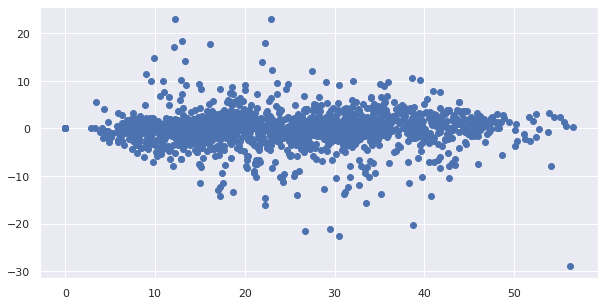

In [ ]:
# Heteroscedasticity check
plt.scatter((y_pred_test_r), (y_test)-(y_pred_test_r))


The above plot suggests that the error is homogeneous

In [ ]:
rf_model.feature_importances_

array([1.64285127e-01, 1.07379116e-02, 1.12521464e-02, 8.33074215e-02,
       2.56602851e-02, 1.79057629e-03, 8.24509010e-02, 4.75746415e-03,
       9.44558880e-03, 1.36497299e-02, 1.83418400e-02, 1.72159714e-02,
       8.98668001e-03, 3.47240563e-03, 9.81420844e-03, 7.61489974e-04,
       2.48485656e-03, 1.12322575e-03, 2.72626438e-04, 2.01551009e-04,
       2.71273575e-04, 1.16609973e-03, 3.58492208e-03, 1.05967112e-02,
       2.89448289e-02, 1.81937908e-02, 1.63796985e-02, 2.51442273e-02,
       2.15687575e-02, 5.84322120e-03, 4.89225563e-03, 1.31019432e-03,
       1.82872469e-01, 3.96073422e-03, 1.56497369e-01, 8.58625581e-04,
       7.48658363e-04, 1.54743449e-04, 1.94977222e-04, 4.92278372e-04,
       2.70165655e-03, 1.41112985e-02, 1.36685192e-03, 6.40253566e-04,
       8.07869868e-04, 8.65111708e-04, 1.82173082e-03, 8.24853613e-03,
       1.19207051e-02, 1.26132793e-03, 1.05739809e-03, 1.50941687e-03])

In [ ]:
X_train.head()

,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Temperature_and_dew_temp,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,func_day_Yes,months_string_August,months_string_December,months_string_February,months_string_January,months_string_July,months_string_June,months_string_March,months_string_May,months_string_November,months_string_October,months_string_September,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday
2031,62,0.6,291,1.22,0.0,0.0,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,57,2.4,2000,0.84,0.0,0.0,47.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6371,57,1.7,1992,0.88,0.1,0.0,50.3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3490,29,0.6,1749,2.20,0.0,0.0,11.8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7700,47,1.1,2000,0.00,0.0,0.0,13.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
32,seasons_Winter,0.18
0,humidity,0.16
34,func_day_Yes,0.16
3,solar_radiation,0.08
6,Temperature_and_dew_temp,0.08
4,rainfall,0.03
27,hour_21,0.03
24,hour_18,0.03
11,hour_5,0.02
28,hour_22,0.02


In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

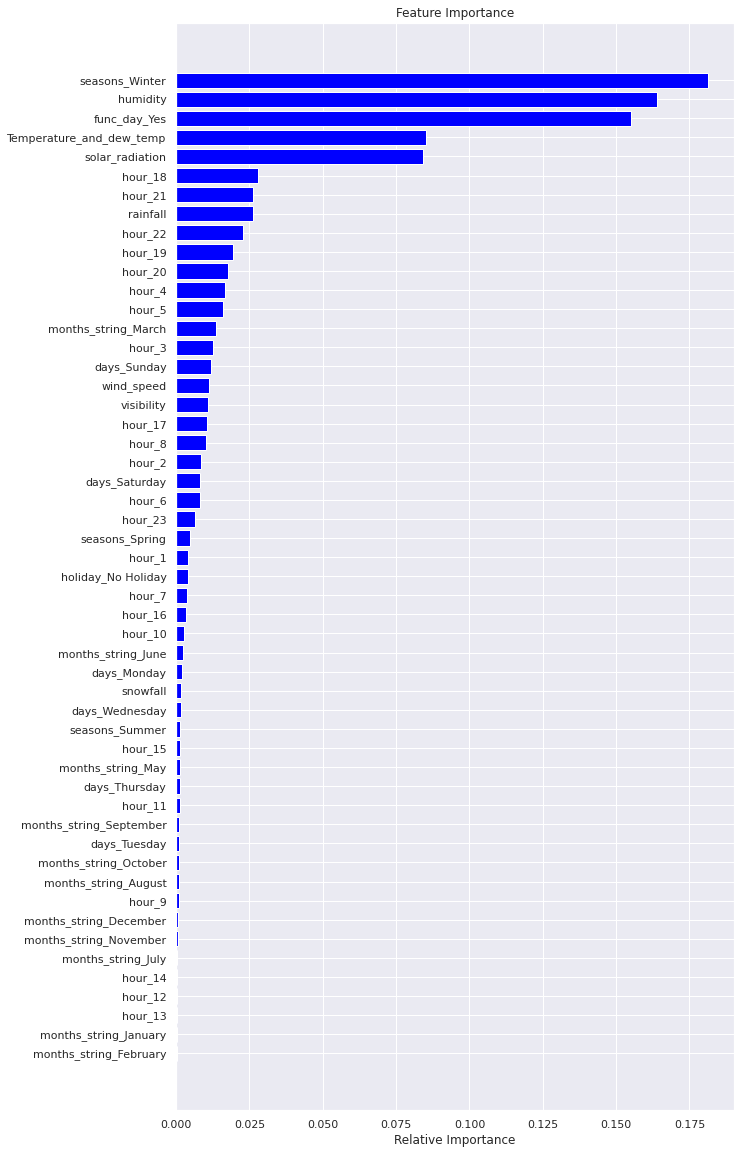

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Random Forest Round with hyper parameter adjusted via GridSearchCV



In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# making predictions on train and test data
train_preds = rf_optimal_model.predict(X_train)
test_preds = rf_optimal_model.predict(X_test)

In [ ]:
# evaluating metrics for train data
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_grid.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train**2, train_preds**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train**2, train_preds**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_train)**2, (train_preds)**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train**2, train_preds**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted_R2 :', Adjusted_R2_rf)

Model Score: 0.7858162047551908
MSE : 114989.5189604648
RMSE : 339.1010453544265
MAE : 224.95335192163103
R2 : 0.7230789844881316
Adjusted_R2 : 0.714603473713195


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression train with GridCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
train_df = train_df.append(dict1, ignore_index = True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75
2,Ridge regression train,215.880,100807.652,317.502,0.757,0.75
3,Elastic net regression train,215.738,100613.776,317.197,0.758,0.75
4,Decision tree train,240.900,133881.930,365.899,0.680,0.67
5,Random forest regression,41.322,4970.733,70.503,0.988,0.99
6,Random forest regression train with GridCV,224.953,114989.519,339.101,0.723,0.71


In [ ]:
# evaluating the metrics for test data
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, test_preds**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, test_preds**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test**2), (test_preds**2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test**2), (test_preds**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


MSE : 126395.25103310855
RMSE : 355.52109787340123
MAE : 230.57339397770892
R2 : 0.6979965848440863
Adjusted R2 : 0.6887533961518513


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression test with GridCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.760
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.760
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.780
3,Elastic net regression Test,212.060,98055.505,313.138,0.766,0.759
4,Decision tree train,240.900,133881.930,365.899,0.680,0.670
5,Random forest regression,112.120,39007.823,197.504,0.907,0.904
6,Random forest regression test with GridCV,230.573,126395.251,355.521,0.698,0.689


In [ ]:
#best parameter for the random forest model
optimal_rf_model=rf_grid.best_estimator_
optimal_rf_model

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

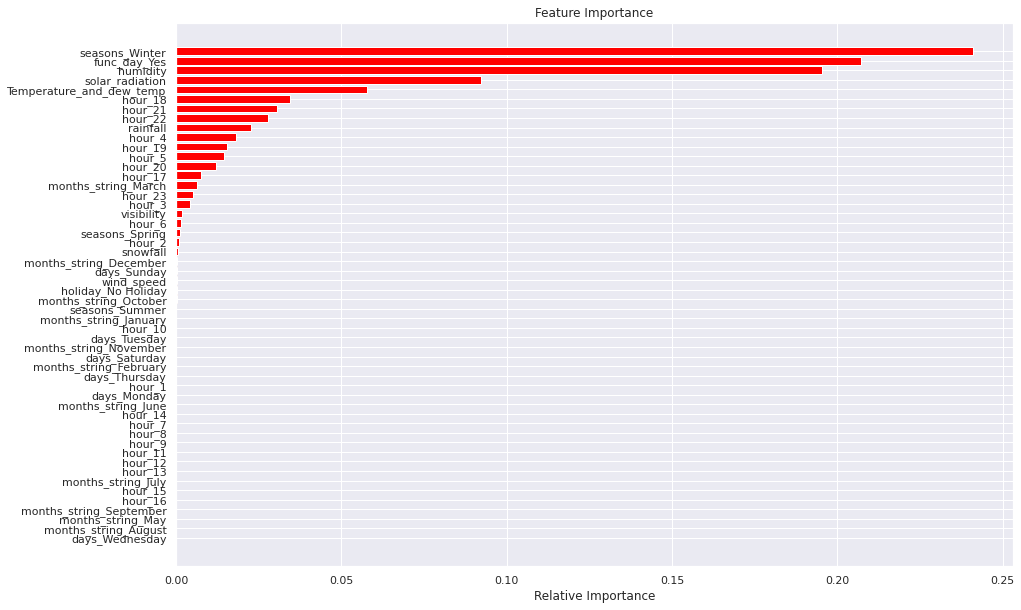

In [ ]:
#def get_features_importance (optimal_model,X_train):

features = X_train.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Gradient Boost

In [ ]:
#importing the library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyper parameter tuning
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train**2, y_pred_train_g_g**2)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train**2, y_pred_train_g_g**2)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train**2, y_pred_train_g_g**2)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train**2, y_pred_train_g_g**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh )


Model Score: 0.9500234383572045
MSE : 24181.081510888747
RMSE : 155.5026736454674
MAE : 96.6038065355551
R2 : 0.941766434813308
Adjusted R2 : 0.9399841244014728


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting train gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
train_df=train_df.append(dict1,ignore_index=True)
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression train,215.732,100605.912,317.184,0.758,0.75
1,Lasso Regression train,215.864,100800.303,317.491,0.757,0.75
2,Ridge regression train,215.880,100807.652,317.502,0.757,0.75
3,Elastic net regression train,215.738,100613.776,317.197,0.758,0.75
4,Decision tree train,240.900,133881.930,365.899,0.680,0.67
5,Random forest regression,41.322,4970.733,70.503,0.988,0.99
6,Random forest regression train with GridCV,224.953,114989.519,339.101,0.723,0.71
7,Gradient Boosting train gridsearchcv,96.604,24181.082,155.503,0.942,0.94


In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test**2, y_pred_g_g**2)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test**2, y_pred_g_g**2)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test**2), (y_pred_g_g**2))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test**2, y_pred_g_g**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh)


MSE : 39358.19179686623
RMSE : 198.38899111812185
MAE : 119.91132705642146
R2 : 0.9059592172976378
Adjusted R2 : 0.9030809826298787


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,212.052,98047.314,313.125,0.766,0.760
1,Lasso regression test,212.203,98235.175,313.425,0.765,0.760
2,Ridge regression test,212.234,98257.409,313.460,0.765,0.780
3,Elastic net regression Test,212.060,98055.505,313.138,0.766,0.759
4,Decision tree train,240.900,133881.930,365.899,0.680,0.670
5,Random forest regression,112.120,39007.823,197.504,0.907,0.904
6,Random forest regression test with GridCV,230.573,126395.251,355.521,0.698,0.689
7,Gradient Boosting gridsearchcv,119.911,39358.192,198.389,0.906,0.900


In [ ]:
gb_optimal_model.feature_importances_

array([1.76235396e-01, 6.48344304e-03, 6.52287726e-03, 6.40735466e-02,
       3.71238884e-02, 1.26165382e-03, 1.51700849e-01, 8.32798337e-04,
       8.73802062e-03, 1.55575980e-02, 2.44339606e-02, 2.23470942e-02,
       7.19552474e-03, 5.27567347e-03, 1.20322130e-02, 1.07897657e-04,
       3.33522666e-03, 1.84482948e-03, 6.30120352e-05, 1.57199823e-04,
       0.00000000e+00, 1.32874968e-04, 1.02681319e-03, 9.76643695e-03,
       3.07033102e-02, 1.82452207e-02, 1.62930432e-02, 2.01561797e-02,
       1.62116115e-02, 3.98958509e-03, 5.64773749e-03, 7.99365370e-04,
       1.31917439e-01, 1.99858350e-03, 1.64124939e-01, 2.13151115e-03,
       1.09488258e-03, 5.52962099e-05, 2.10609407e-04, 2.01450592e-04,
       4.04140324e-03, 4.75203838e-03, 1.41492110e-03, 3.15826255e-04,
       4.86054481e-03, 3.19917979e-04, 7.99245523e-04, 3.94495441e-03,
       8.35923672e-03, 4.13127656e-04, 2.65883131e-04, 4.83307748e-04])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index(drop=True)

,Feature,Feature Importance
0,humidity,0.18
1,func_day_Yes,0.16
2,Temperature_and_dew_temp,0.15
3,seasons_Winter,0.13
4,solar_radiation,0.06
5,rainfall,0.04
6,hour_18,0.03
7,hour_5,0.02
8,hour_22,0.02
9,hour_21,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

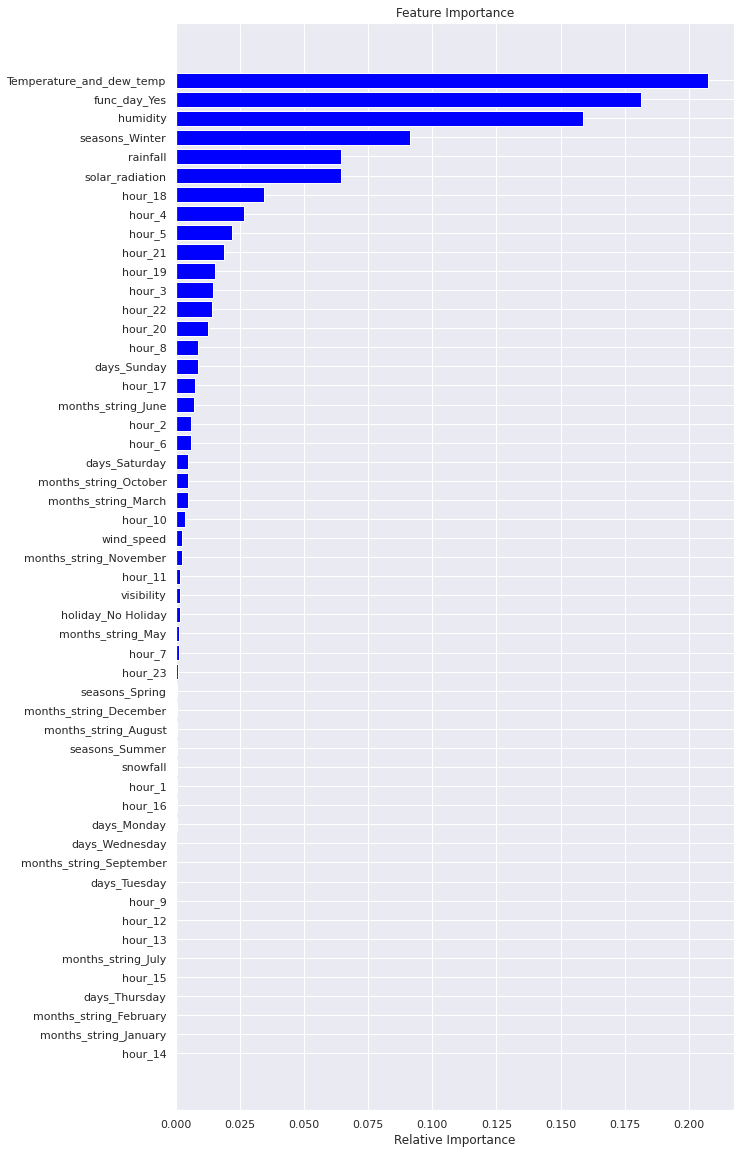

In [ ]:
#Plot the feature importances
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([train_df,test_df],keys=['Training set','Test set'])
result

Model      MAE  \
Training set 0                      Linear regression train  215.732   
             1                       Lasso Regression train  215.864   
             2                      Ridge regression train   215.880   
             3                 Elastic net regression train  215.738   
             4                         Decision tree train   240.900   
             5                    Random forest regression    41.322   
             6  Random forest regression train with GridCV   224.953   
             7        Gradient Boosting train gridsearchcv    96.604   
Test set     0                      Linear regression test   212.052   
             1                        Lasso regression test  212.203   
             2                        Ridge regression test  212.234   
             3                  Elastic net regression Test  212.060   
             4                         Decision tree train   240.900   
             5                    Random forest regression   112.120   
             6   Random forest regression test with GridCV   230.573   
             7              Gradient Boosting gridsearchcv   119.911   

                       MSE     RMSE  R2_score  Adjusted R2  
Training set 0  100605.912  317.184     0.758        0.750  
             1  100800.303  317.491     0.757        0.750  
             2  100807.652  317.502     0.757        0.750  
             3  100613.776  317.197     0.758        0.750  
             4  133881.930  365.899     0.680        0.670  
             5    4970.733   70.503     0.988        0.990  
             6  114989.519  339.101     0.723        0.710  
             7   24181.082  155.503     0.942        0.940  
Test set     0   98047.314  313.125     0.766        0.760  
             1   98235.175  313.425     0.765        0.760  
             2   98257.409  313.460     0.765        0.780  
             3   98055.505  313.138     0.766        0.759  
             4  133881.930  365.899     0.680        0.670  
             5   39007.823  197.504     0.907        0.904  
             6  126395.251  355.521     0.698        0.689  
             7   39358.192  198.389     0.906        0.900

1. Almost all algorithms performed really well on both training dataset and 
testing dataset so we can say that varience is less and no issues of overfittings are present.
2. Both "Random forest regression" and "Gradient Boosting regression(gridsearch cv) has highest R2 score.
3. Performance on "Decision Tree" algorithm is comparitively less with an R2 score of 68%.

We see that while analysing feature importance value as well as regression coefficients,our prediction algorithms are mostly dependend on contineous numerical variables like temperature and seasons.So there are chances when the weather condition changes drastically our algorithm may fails to predict the target variable.  